In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
import matplotlib.pyplot as plt
import wordcloud
import plotly.express as px
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kushagra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
train_data=pd.read_csv("train_av.csv")
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
test_data=pd.read_csv("test_av.csv")
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [4]:
train_data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [5]:
test_data.isnull().sum()

id       0
tweet    0
dtype: int64

In [6]:
train_data['label1'] = train_data['label'].apply(lambda x: 'negative' if x == 0 else 'positive')

train_data.head()

,id,label,tweet,label1
0,1,0,@user when a father is dysfunctional and is s...,negative
1,2,0,@user @user thanks for #lyft credit i can't us...,negative
2,3,0,bihday your majesty,negative
3,4,0,#model i love u take with u all the time in ...,negative
4,5,0,factsguide: society now #motivation,negative


<Axes: xlabel='label1', ylabel='count'>

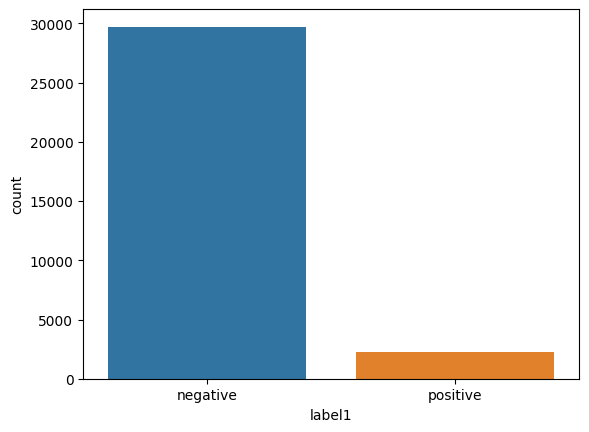

In [7]:
sns.countplot(data=train_data,x=train_data["label1"])

In [8]:
fig=px.pie(train_data,names="label1",title="pie chart of labels")
fig.show()

In [9]:
all_stopwords=stopwords.words('english')
ps=PorterStemmer()

In [10]:
def make_fun(df):
  k,p=df.shape
  print(k,p)
  corpus=[]
  for i in range(0,k):
     review=re.sub('[^a-zA-Z]',' ',df['tweet'][i])
     review=review.lower()
     review=review.split()
     review=[ps.stem(word)for word in review if not word in set(all_stopwords)]
     review=' '.join(review)
     corpus.append(review)
  return corpus

In [11]:
train_data.shape

(31962, 4)

In [12]:
train_data['changed_tweet']=make_fun(train_data)
train_data.head()

31962 4


,id,label,tweet,label1,changed_tweet
0,1,0,@user when a father is dysfunctional and is s...,negative,user father dysfunct selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,negative,user user thank lyft credit use caus offer whe...
2,3,0,bihday your majesty,negative,bihday majesti
3,4,0,#model i love u take with u all the time in ...,negative,model love u take u time ur
4,5,0,factsguide: society now #motivation,negative,factsguid societi motiv


In [13]:
test_data["changed_tweet"]=make_fun(test_data)
test_data.head()

17197 2


,id,tweet,changed_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolif aislif requir passion dedic willpow ...
1,31964,@user #white #supremacists want everyone to s...,user white supremacist want everyon see new bi...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acn altwaystoh healthi heal
3,31966,is the hp and the cursed child book up for res...,hp curs child book reserv alreadi ye harrypott...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amaz hilari nephew eli ahmir uncl da...


In [14]:


normal_words =' '.join([str(text) for text in train_data['changed_tweet'][train_data['label'] == 0]]) 




positive_words =' '.join([str(text) for text in train_data['changed_tweet'][train_data['label'] == 1]])




In [15]:
print((normal_words))



user father dysfunct selfish drag kid dysfunct run user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank bihday majesti model love u take u time ur factsguid societi motiv huge fan fare big talk leav chao pay disput get allshowandnogo user camp tomorrow user user user user user user user danni next school year year exam think school exam hate imagin actorslif revolutionschool girl love land allin cav champion cleveland clevelandcavali user user welcom gr ireland consum price index mom climb previou may blog silver gold forex selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love get see daddi today day gettingf ouch junior angri got junior yugyoem omg thank paner thank posit friday smile around via ig user user cooki make peopl know essenti oil made chemic euro peopl blame ha conced goal fat rooney gave away free kick know bale hit sad littl dude badday coneofsham cat piss funni laugh product day happi man wine tool 

In [16]:
def wordcloud_fun(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5 
).generate((data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

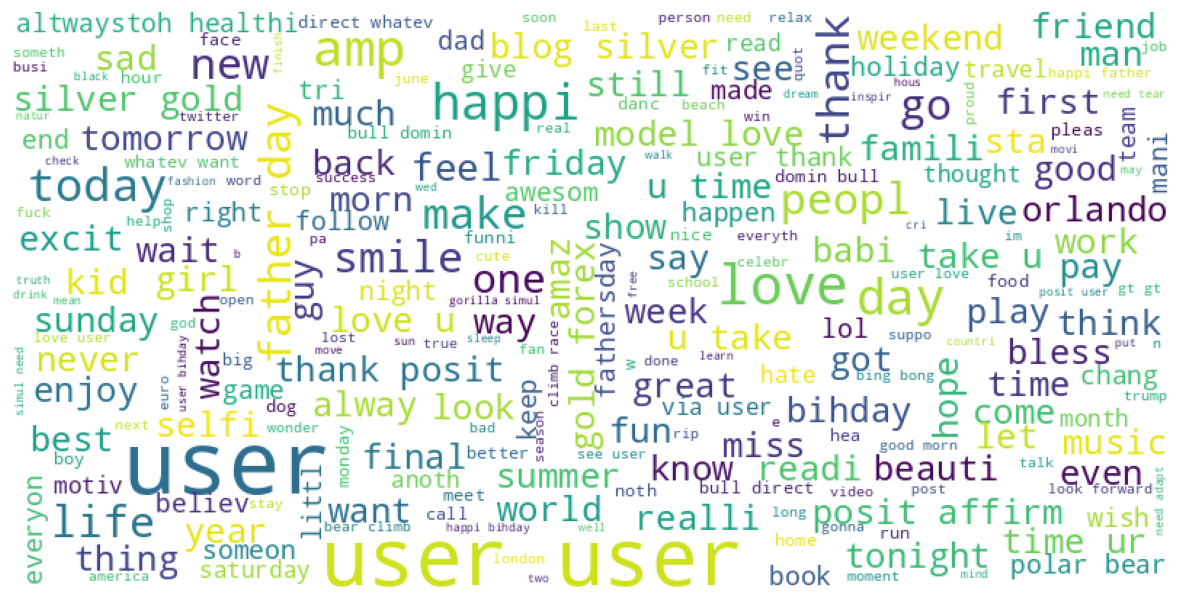

In [17]:
wordcloud_fun(normal_words)

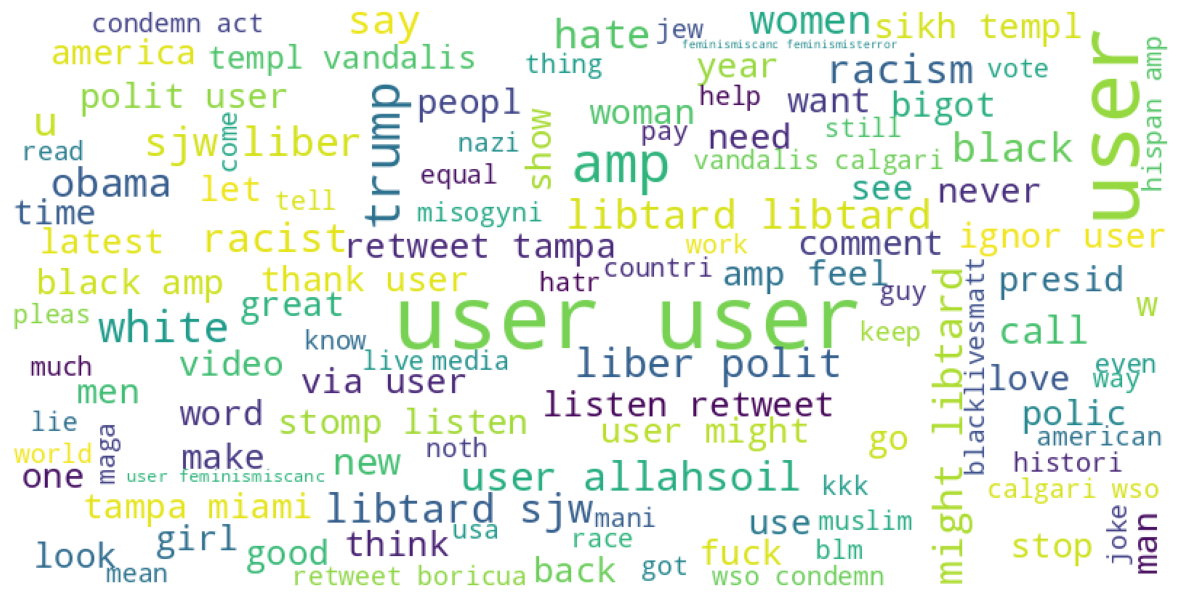

In [18]:
wordcloud_fun(positive_words)

In [19]:
cv=CountVectorizer()

In [20]:
train_data_vectorize=cv.fit_transform(train_data['changed_tweet']).toarray()
train_data_vectorize

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
test_data_vectorize=cv.transform(test_data['changed_tweet']).toarray()
test_data_vectorize

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
y_train=train_data['label'].values
y_train.reshape(1,-1)
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [23]:
predictor=MultinomialNB()


In [24]:
predictor.fit(train_data_vectorize,y_train)

MultinomialNB()

In [25]:
predictor.score(train_data_vectorize,y_train)

0.9696827482635629

In [26]:
predicted_test=predictor.predict(test_data_vectorize)
print(predicted_test)

[0 0 0 ... 0 0 0]
